In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time

In [36]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

ice_cream_df = pd.read_csv('ice_cream.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [37]:
ice_cream_df.head()


date
1972-01-01    59.9622
1972-02-01    67.0605
1972-03-01    74.2350
1972-04-01    78.1120
1972-05-01    84.7636
Name: production, dtype: float64

In [49]:
def plot_series(series, series_str, color='red',styr= 2010, endyr=2021):
    plt.figure(figsize=(12,6))
    plt.plot(series, color=color)
    plt.ylabel('Search Frequency for {}'.format(series_str), fontsize=16)

    for year in range(styr, endyr):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

In [50]:
start_date = pd.to_datetime('2010-01-01')
ice_cream_df1 = ice_cream_df[start_date:]
ice_cream_df1.head()

date
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
Name: production, dtype: float64

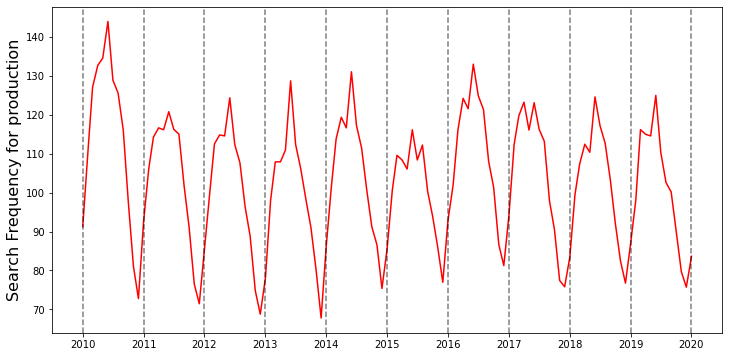

In [51]:
plot_series(ice_cream_df1, 'production')

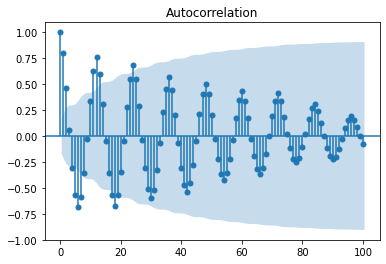

In [33]:
acf_plot = plot_acf(ice_cream_df1, lags=100)

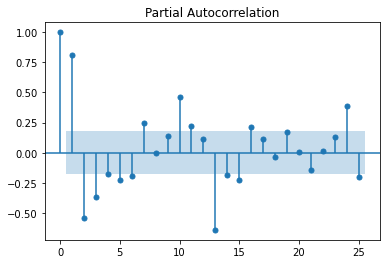

In [39]:
pacf_plot = plot_pacf(ice_cream_df1, lags=25)

# train test data

In [43]:
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)

train_data = ice_cream_df1[:train_end]
test_data = ice_cream_df1[train_end + timedelta(days=1):test_end]


# AR

In [55]:
# define model
model = ARMA(train_data, order=(3,0))
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

/Users/abhipubali/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/abhipubali/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was pro

Model Fitting Time: 0.9723598957061768


In [56]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:             production   No. Observations:                  108
Model:                     ARMA(7, 0)   Log Likelihood                -361.526
Method:                       css-mle   S.D. of innovations              6.754
Date:                Mon, 01 Apr 2024   AIC                            741.051
Time:                        18:27:08   BIC                            765.191
Sample:                    01-01-2010   HQIC                           750.839
                         - 12-01-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              103.6216      1.159     89.389      0.000     101.350     105.894
ar.L1.production     0.9497      0.092     10.267      0.000       0.768       1.131
ar.L2.production    -0.0964 

In [57]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [58]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

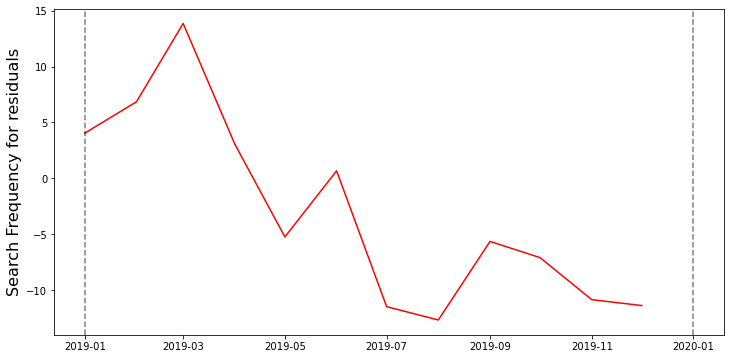

In [59]:
plot_series(residuals, 'residuals',styr=2019,endyr=2021)

Text(0, 0.5, 'Sales')

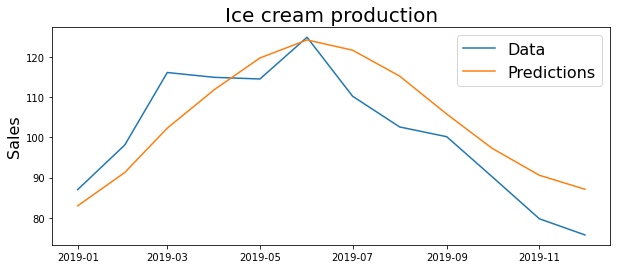

In [60]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Ice cream production', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [61]:
np.sqrt(np.mean(residuals**2))

8.725150828870728